# IMPORTS

In [20]:
import random
import pickle
import glob

import random
import ast

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from collections import Counter

from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





In [21]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [22]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



## Setting/Loading Required Variables

In [69]:
pop_mean = 2.003939745539731e-05
pop_sd = 2.4549518663543686

In [70]:
###
### use in case lost

crit_count_dict = {12: 1441, 0: 30935, 9: 1588, 56: 376, 61: 306, 44: 890, 48: 657, 47: 745, 59: 324, 29: 937, 52: 485, 24: 1038, 13: 1309, 71: 190, 28: 965, 1: 3377, 11: 1451, 50: 489, 46: 857, 39: 742, 20: 1061, 5: 1929, 21: 1044, 37: 785, 7: 1660, 45: 893, 41: 881, 38: 808, 62: 254, 19: 1173, 25: 996, 66: 241, 36: 844, 6: 1772, 4: 2098, 8: 1648, 42: 910, 49: 643, 2: 2726, 14: 1283, 63: 263, 3: 2354, 31: 926, 70: 226, 32: 890, 75: 147, 18: 1156, 68: 217, 43: 925, 35: 882, 22: 1111, 85: 83, 16: 1222, 10: 1489, 26: 979, 34: 886, 81: 99, 64: 274, 53: 473, 15: 1218, 60: 336, 27: 968, 23: 1041, 82: 110, 30: 851, 40: 803, 73: 170, 92: 65, 58: 332, 17: 1132, 74: 143, 91: 64, 57: 361, 55: 387, 105: 37, 33: 890, 65: 221, 67: 209, 99: 34, 76: 128, 54: 412, 83: 88, 94: 50, 51: 492, 97: 46, 93: 57, 79: 117, 69: 204, 96: 50, 88: 87, 89: 75, 78: 109, 95: 49, 80: 94, 149: 1, 86: 81, 104: 35, 72: 160, 119: 10, 87: 90, 140: 3, 116: 12, 77: 157, 107: 21, 103: 30, 101: 33, 84: 101, 98: 47, 108: 21, 90: 74, 106: 29, 112: 20, 100: 25, 111: 20, 102: 29, 109: 14, 127: 13, 134: 1, 118: 6, 115: 18, 114: 17, 124: 5, 128: 7, 144: 2, 137: 2, 191: 1, 117: 12, 135: 5, 132: 4, 145: 1, 125: 6, 123: 5, 142: 3, 133: 5, 110: 16, 120: 5, 113: 14, 126: 6, 138: 4, 121: 7, 139: 1, 154: 1, 197: 1, 122: 5, 136: 4, 147: 2, 131: 4, 129: 1, 141: 1, 155: 1, 156: 1, 159: 4, 143: 3, 148: 1, 166: 1, 174: 1, 130: 3, 173: 1, 150: 1, 151: 1, 157: 1}
crit_count_dict = dict(sorted(crit_count_dict.items()))

In [103]:
max_crit_count = 51

In [71]:
standard_crit_count_dict = {}


### 51, 23, ...
### df : 50, 22, ...
for i in range(0, max_crit_count):
    # print(i)
    standard_crit_count_dict[i] = crit_count_dict[i]
    
print(standard_crit_count_dict)

{0: 30935, 1: 3377, 2: 2726, 3: 2354, 4: 2098, 5: 1929, 6: 1772, 7: 1660, 8: 1648, 9: 1588, 10: 1489, 11: 1451, 12: 1441, 13: 1309, 14: 1283, 15: 1218, 16: 1222, 17: 1132, 18: 1156, 19: 1173, 20: 1061, 21: 1044, 22: 1111, 23: 1041, 24: 1038, 25: 996, 26: 979, 27: 968, 28: 965, 29: 937, 30: 851, 31: 926, 32: 890, 33: 890, 34: 886, 35: 882, 36: 844, 37: 785, 38: 808, 39: 742, 40: 803, 41: 881, 42: 910, 43: 925, 44: 890, 45: 893, 46: 857, 47: 745, 48: 657, 49: 643, 50: 489}


In [72]:
standard_len = np.sum(list(standard_crit_count_dict.values()))

In [102]:
# type(pd.Series(list(crit_count_dict.values()))/1000)
standard_ratios = pd.Series(list(standard_crit_count_dict.values()))/standard_len
print(standard_len)
# print(standard_ratios[:10])
print(standard_ratios[:])
# print(np.sum(standard_ratios))

90298
0     0.342588
1     0.037398
2     0.030189
3     0.026069
4     0.023234
5     0.021363
6     0.019624
7     0.018384
8     0.018251
9     0.017586
10    0.016490
11    0.016069
12    0.015958
13    0.014496
14    0.014209
15    0.013489
16    0.013533
17    0.012536
18    0.012802
19    0.012990
20    0.011750
21    0.011562
22    0.012304
23    0.011528
24    0.011495
25    0.011030
26    0.010842
27    0.010720
28    0.010687
29    0.010377
30    0.009424
31    0.010255
32    0.009856
33    0.009856
34    0.009812
35    0.009768
36    0.009347
37    0.008693
38    0.008948
39    0.008217
40    0.008893
41    0.009757
42    0.010078
43    0.010244
44    0.009856
45    0.009889
46    0.009491
47    0.008250
48    0.007276
49    0.007121
50    0.005415
dtype: float64


In [74]:
window_size = 50

## Gathering All Live Data

In [80]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-11 15:21:02


61262


100%|██████████| 61262/61262 [06:19<00:00, 161.53it/s]


----------------------------------------------------
done in 379.484s.
2024-04-11 15:27:21


In [81]:
len(f_crit_count_list)

42127

In [82]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 22.995679730339212
### 25.72779276339963
### 1.4174699442494285


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902


22.995679730339212
25.72779276339963
1.4174699442494285


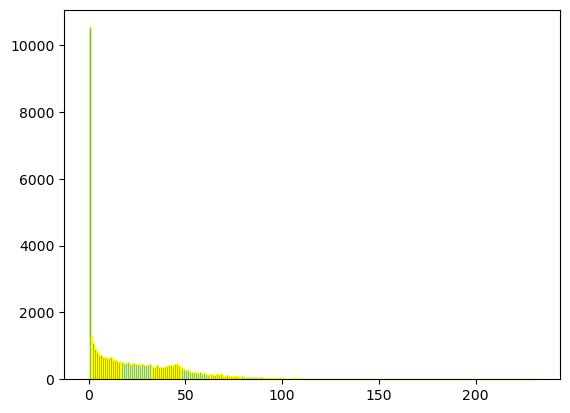

In [83]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

### - chi squared test

In [84]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{27: 443, 10: 638, 61: 142, 65: 125, 39: 381, 31: 449, 0: 10532, 62: 152, 13: 562, 7: 673, 16: 556, 34: 377, 3: 908, 1: 1301, 44: 452, 11: 652, 20: 507, 53: 225, 2: 1076, 71: 114, 40: 411, 30: 421, 42: 438, 48: 336, 25: 451, 4: 820, 22: 472, 32: 387, 8: 667, 84: 78, 46: 402, 14: 535, 81: 61, 24: 446, 87: 51, 94: 32, 38: 373, 35: 430, 37: 353, 21: 460, 60: 171, 63: 161, 29: 418, 97: 34, 47: 372, 49: 316, 6: 723, 26: 421, 17: 502, 57: 203, 92: 50, 15: 525, 23: 481, 12: 579, 41: 424, 9: 628, 5: 719, 56: 194, 28: 415, 93: 38, 43: 405, 36: 376, 19: 486, 88: 58, 72: 87, 50: 272, 68: 146, 76: 91, 78: 83, 51: 278, 158: 3, 79: 94, 86: 54, 64: 121, 66: 147, 33: 376, 52: 227, 75: 102, 98: 32, 59: 184, 70: 112, 55: 207, 82: 63, 54: 223, 45: 455, 85: 55, 18: 489, 89: 59, 83: 72, 67: 137, 154: 3, 80: 70, 100: 34, 91: 53, 105: 34, 73: 96, 74: 105, 123: 6, 58: 164, 90: 40, 99: 30, 112: 15, 107: 13, 128: 9, 77: 78, 69: 102, 119: 16, 108: 28, 106: 19, 104: 22, 110: 16, 109: 15, 142: 5, 103: 22, 163: 1, 

## Gathering Live Data by ELO

### Bronze

2024-04-12 22:36:08


4165


100%|██████████| 4165/4165 [00:22<00:00, 182.10it/s]



----------------------------------------------------
done in 22.898s.
2024-04-12 22:36:30
2555
23.145988258317026
26.228489808673654
1.5489490269551813


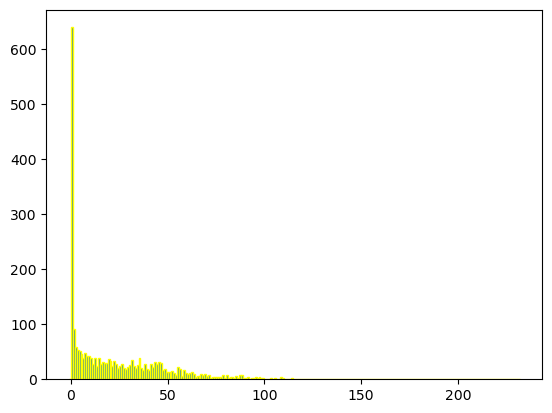

In [104]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/bronze/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [110]:
len(f_crit_count_list)

2555

#### - chi squared test

In [90]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{29: 23, 6: 39, 0: 639, 4: 51, 39: 18, 52: 15, 45: 31, 14: 38, 23: 28, 36: 20, 76: 4, 25: 24, 19: 36, 54: 8, 18: 29, 22: 34, 32: 25, 15: 27, 53: 12, 8: 43, 3: 53, 2: 59, 5: 45, 20: 34, 1: 91, 47: 17, 9: 43, 55: 22, 43: 31, 26: 28, 7: 47, 42: 22, 12: 38, 58: 16, 17: 30, 33: 21, 59: 11, 41: 27, 24: 21, 44: 27, 13: 25, 31: 35, 30: 26, 61: 11, 21: 25, 93: 2, 78: 8, 62: 13, 46: 29, 74: 5, 35: 38, 40: 17, 95: 4, 77: 5, 10: 39, 87: 8, 37: 17, 48: 18, 34: 26, 38: 28, 56: 19, 16: 32, 27: 21, 57: 6, 75: 5, 51: 14, 81: 2, 60: 10, 80: 7, 98: 2, 67: 10, 28: 19, 50: 13, 11: 28, 49: 14, 63: 9, 130: 1, 66: 6, 124: 1, 108: 4, 69: 9, 71: 7, 102: 1, 82: 5, 86: 3, 114: 2, 88: 8, 79: 3, 111: 1, 96: 3, 91: 4, 97: 4, 113: 1, 99: 2, 83: 5, 94: 3, 103: 2, 70: 6, 85: 6, 90: 2, 134: 1, 73: 4, 110: 1, 89: 2, 65: 6, 105: 3, 178: 1, 64: 4, 232: 1, 68: 8, 126: 1, 92: 1, 140: 1, 101: 1, 84: 3, 72: 2, 131: 1, 204: 1, 109: 2, 119: 1, 121: 1, 129: 1, 112: 1, 122: 1}
{0: 639, 1: 91, 2: 59, 3: 53, 4: 51, 5: 45, 6: 39, 7: 

### Silver

2024-04-12 22:50:59


5557


100%|██████████| 5557/5557 [00:32<00:00, 170.15it/s]



----------------------------------------------------
done in 32.684s.
2024-04-12 22:51:32
3744
23.37580128205128
25.25022344614339
1.2943837027259117


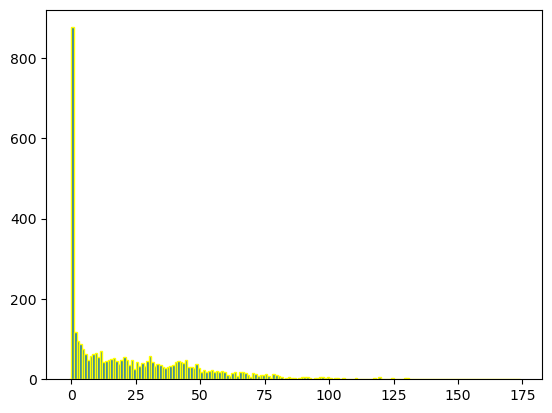

In [111]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/silver/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [112]:
len(f_crit_count_list)

3744

#### - chi squared test

In [113]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{0: 876, 17: 46, 44: 49, 12: 44, 47: 28, 19: 48, 54: 24, 5: 63, 3: 88, 48: 38, 30: 57, 16: 54, 46: 31, 14: 49, 26: 32, 41: 45, 11: 70, 42: 42, 65: 19, 8: 64, 2: 95, 10: 56, 13: 46, 59: 19, 32: 34, 85: 2, 83: 4, 1: 117, 51: 22, 40: 42, 37: 30, 18: 39, 23: 47, 81: 6, 50: 19, 68: 10, 4: 75, 75: 12, 99: 5, 25: 42, 15: 50, 70: 15, 117: 3, 22: 35, 66: 19, 21: 47, 20: 55, 72: 9, 34: 35, 27: 40, 52: 19, 31: 44, 7: 57, 24: 26, 35: 31, 6: 47, 9: 66, 36: 29, 29: 46, 33: 38, 77: 2, 71: 14, 49: 28, 43: 40, 61: 9, 60: 11, 84: 5, 53: 21, 45: 31, 107: 1, 28: 32, 63: 17, 127: 1, 73: 10, 57: 18, 69: 6, 64: 8, 56: 21, 125: 1, 80: 7, 39: 36, 67: 15, 55: 17, 38: 34, 100: 4, 58: 20, 79: 10, 124: 2, 74: 10, 78: 12, 62: 15, 119: 5, 95: 2, 96: 6, 90: 6, 101: 1, 129: 2, 82: 1, 97: 6, 105: 3, 92: 2, 76: 9, 86: 3, 98: 2, 108: 1, 169: 1, 89: 5, 110: 2, 91: 5, 87: 1, 139: 1, 109: 1, 133: 1, 102: 2, 115: 1, 103: 3, 104: 1, 130: 2, 88: 2, 113: 1, 174: 1, 94: 2, 123: 1, 112: 1, 93: 1, 128: 1, 116: 1}
{0: 876, 1: 117, 

### Gold

2024-04-12 22:51:32


6281


100%|██████████| 6281/6281 [00:38<00:00, 163.12it/s]


----------------------------------------------------
done in 38.528s.
2024-04-12 22:52:11
4315
24.050521436848204
26.614578752283034
1.438078987406802


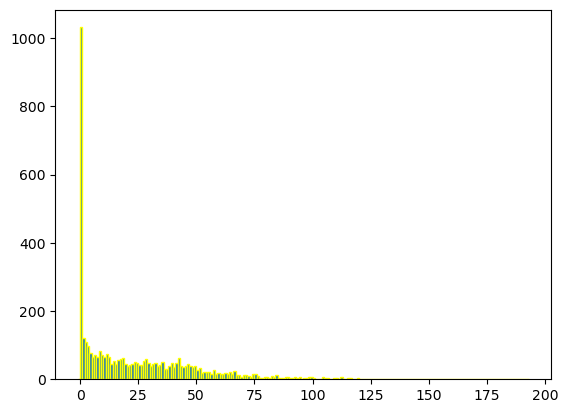

In [114]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/gold/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [115]:
len(f_crit_count_list)

4315

#### - chi squared test

In [116]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{28: 58, 9: 70, 10: 64, 2: 110, 6: 71, 0: 1032, 89: 6, 91: 5, 20: 38, 4: 78, 106: 5, 45: 38, 33: 39, 42: 62, 39: 47, 44: 36, 100: 3, 52: 19, 29: 48, 13: 44, 34: 41, 38: 38, 16: 56, 1: 120, 72: 10, 25: 42, 84: 13, 7: 65, 3: 97, 27: 54, 40: 37, 48: 36, 11: 73, 43: 38, 5: 66, 8: 83, 18: 61, 53: 20, 19: 44, 24: 47, 12: 66, 35: 52, 66: 23, 26: 42, 15: 46, 21: 43, 76: 11, 31: 46, 17: 58, 71: 12, 14: 55, 23: 50, 32: 47, 105: 4, 58: 15, 83: 7, 94: 6, 55: 20, 56: 15, 60: 15, 37: 30, 119: 3, 46: 45, 50: 28, 82: 9, 59: 18, 30: 39, 47: 38, 41: 48, 67: 13, 70: 14, 57: 28, 51: 32, 96: 5, 61: 15, 63: 15, 68: 13, 85: 5, 115: 3, 78: 5, 77: 4, 65: 16, 64: 21, 75: 16, 36: 30, 147: 1, 22: 46, 93: 4, 49: 39, 130: 1, 126: 2, 99: 7, 104: 8, 74: 15, 81: 4, 54: 22, 62: 18, 92: 8, 79: 7, 80: 6, 112: 6, 108: 2, 88: 6, 170: 1, 97: 4, 116: 3, 142: 1, 73: 7, 110: 4, 121: 1, 146: 1, 69: 6, 138: 1, 87: 5, 86: 3, 182: 1, 114: 1, 98: 8, 90: 5, 109: 3, 153: 1, 123: 1, 193: 1, 181: 1, 125: 2, 95: 2, 103: 1, 111: 1, 156: 

### Emerald

2024-04-12 22:52:11


14064


100%|██████████| 14064/14064 [01:27<00:00, 161.15it/s]



----------------------------------------------------
done in 87.325s.
2024-04-12 22:53:38
9638
22.037248391782526
25.182751065298298
1.4735116508577994


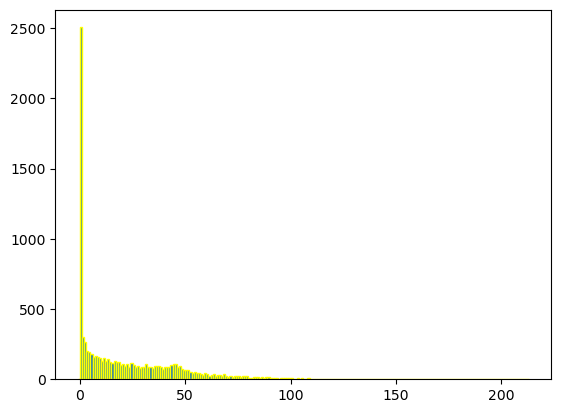

In [117]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/emerald/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [118]:
len(f_crit_count_list)

9638

#### - chi squared test

In [119]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{25: 100, 29: 90, 37: 92, 46: 85, 12: 130, 3: 204, 4: 197, 0: 2507, 5: 179, 2: 265, 20: 110, 90: 9, 43: 100, 23: 89, 19: 101, 28: 79, 51: 64, 68: 38, 9: 151, 34: 78, 69: 24, 98: 6, 32: 88, 47: 94, 53: 47, 11: 152, 42: 85, 31: 111, 7: 163, 41: 87, 8: 159, 45: 108, 6: 160, 27: 93, 15: 118, 21: 97, 14: 123, 40: 91, 55: 43, 39: 70, 61: 25, 36: 97, 16: 132, 101: 5, 33: 88, 35: 96, 81: 11, 89: 14, 24: 114, 17: 123, 49: 68, 44: 107, 18: 123, 54: 52, 50: 66, 1: 303, 30: 84, 59: 44, 13: 147, 26: 91, 86: 15, 10: 133, 94: 4, 48: 70, 76: 17, 57: 41, 58: 32, 87: 7, 22: 112, 65: 27, 52: 52, 73: 24, 38: 88, 74: 23, 129: 2, 83: 17, 64: 25, 102: 3, 105: 9, 82: 13, 84: 17, 71: 24, 77: 20, 63: 36, 78: 20, 85: 10, 116: 3, 60: 39, 62: 29, 70: 17, 97: 8, 56: 48, 99: 8, 96: 6, 91: 11, 125: 1, 67: 24, 143: 1, 75: 21, 80: 11, 93: 9, 111: 4, 79: 21, 108: 9, 92: 7, 95: 6, 66: 29, 189: 2, 117: 3, 126: 5, 141: 2, 148: 2, 106: 4, 128: 2, 88: 14, 124: 3, 115: 4, 72: 15, 138: 2, 188: 1, 103: 6, 119: 3, 100: 9, 121: 2

### Diamond

2024-04-12 22:53:38


23863


100%|██████████| 23863/23863 [02:28<00:00, 160.76it/s]



----------------------------------------------------
done in 148.532s.
2024-04-12 22:56:07
16500
23.582363636363635
26.012364272001186
1.3712199159401681


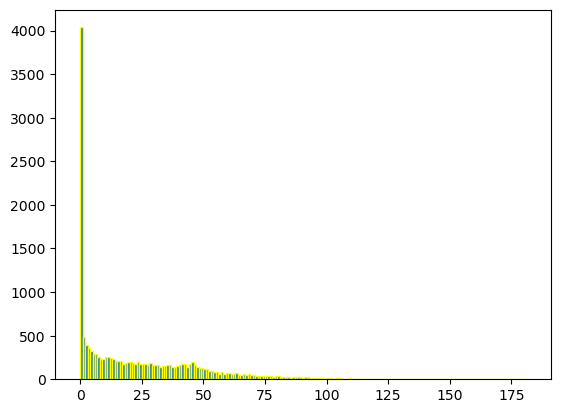

In [120]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/diamond/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [121]:
len(f_crit_count_list)

16500

#### - chi squared test

In [122]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{27: 169, 10: 259, 61: 64, 65: 49, 39: 158, 31: 159, 0: 4037, 62: 57, 13: 231, 7: 250, 16: 212, 34: 147, 3: 355, 1: 486, 44: 175, 11: 256, 20: 202, 53: 100, 2: 389, 71: 43, 40: 160, 30: 160, 42: 173, 48: 132, 25: 180, 4: 322, 22: 180, 32: 141, 8: 230, 84: 30, 46: 169, 14: 209, 81: 30, 24: 179, 87: 24, 94: 11, 38: 139, 35: 169, 37: 138, 21: 186, 60: 76, 63: 67, 29: 159, 97: 10, 47: 141, 49: 134, 6: 287, 26: 171, 17: 180, 57: 86, 92: 23, 15: 215, 23: 200, 12: 244, 41: 170, 9: 227, 5: 294, 56: 65, 28: 185, 93: 15, 43: 143, 36: 160, 19: 202, 88: 23, 72: 42, 50: 119, 68: 66, 76: 39, 78: 31, 51: 121, 158: 3, 79: 43, 86: 28, 64: 48, 66: 55, 33: 148, 52: 95, 75: 37, 98: 11, 59: 71, 70: 44, 55: 83, 82: 27, 54: 84, 45: 197, 85: 20, 18: 183, 89: 23, 83: 30, 67: 54, 154: 2, 80: 32, 100: 14, 91: 22, 105: 14, 73: 39, 74: 36, 123: 3, 58: 62, 90: 17, 99: 7, 112: 5, 107: 7, 128: 4, 77: 40, 69: 46, 119: 2, 108: 8, 106: 8, 104: 10, 110: 8, 109: 9, 142: 4, 103: 6, 163: 1, 95: 20, 113: 5, 115: 7, 172: 1, 1

### CH_GM_M

2024-04-12 22:56:07


7332


100%|██████████| 7332/7332 [00:48<00:00, 151.81it/s]



----------------------------------------------------
done in 48.323s.
2024-04-12 22:56:55
5375
21.730232558139534
25.069833024032956
1.4528447570332068


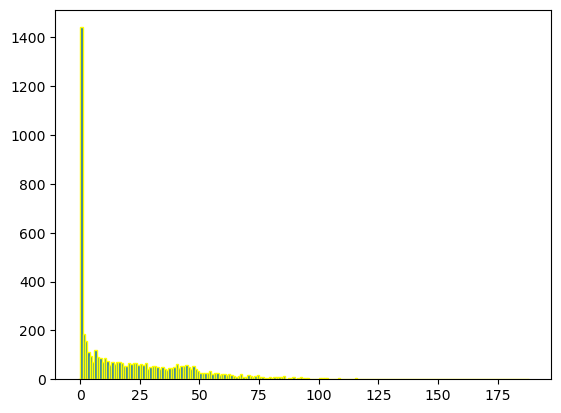

In [123]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


parent_data_folder = 'live_data/raw'

# datafiles_list = glob.glob(f'{parent_data_folder}/*/*/*.txt')
datafiles_list = glob.glob(f'{parent_data_folder}/ch_gm_m/*/*.txt')
# datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')

# print(datafolders_list[:100])

print(len(datafiles_list))


f_crit_count_list = []
for one_record_file in tqdm(datafiles_list):
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))



print(len(f_crit_count_list))


print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 
### 
### 


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902



# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()


In [124]:
len(f_crit_count_list)

5375

#### - chi squared test

In [125]:
crit_count_dict = dict(Counter(f_crit_count_list))

print(crit_count_dict)

crit_count_dict = dict(sorted(crit_count_dict.items()))

print(crit_count_dict)

observed_crit_count_dict = {}

for i in range(0, max_crit_count):
    if i in crit_count_dict.keys():
        observed_crit_count_dict[i] = crit_count_dict[i]
    else:
        observed_crit_count_dict[i] = 0
        
print(f'> observed_crit_count_dict : {observed_crit_count_dict}')

num_observed = np.sum(list(observed_crit_count_dict.values()))

print(num_observed)


sum_for_chi = 0

for i in range(0, max_crit_count):
    expected = standard_ratios[i]*num_observed    ### = denominator
    numerator = (observed_crit_count_dict[i] - expected)**2
    
    chi_indi = numerator/expected
    
    print(f'crit_count : {i}')
    print(f'expected : {expected}')
    print(f'observed : {observed_crit_count_dict[i]}')
    print(f'numerator : {numerator}')
    print(f'chi_indi : {chi_indi}')
    print('------')

    sum_for_chi += chi_indi
                    
print(sum_for_chi)
    


{17: 65, 33: 42, 1: 184, 3: 111, 18: 54, 0: 1441, 31: 54, 27: 66, 49: 33, 6: 119, 7: 91, 2: 158, 25: 63, 22: 65, 66: 15, 28: 42, 14: 61, 30: 55, 4: 97, 43: 53, 45: 50, 38: 46, 29: 52, 32: 52, 13: 69, 62: 20, 21: 62, 65: 8, 11: 73, 42: 54, 15: 69, 23: 67, 10: 87, 36: 40, 70: 16, 8: 88, 26: 57, 85: 12, 12: 57, 24: 59, 67: 21, 47: 54, 87: 6, 79: 10, 56: 26, 5: 72, 55: 22, 57: 24, 60: 20, 16: 70, 53: 25, 74: 16, 44: 58, 20: 68, 58: 19, 80: 7, 9: 71, 41: 47, 54: 33, 117: 1, 88: 5, 19: 55, 98: 3, 52: 27, 81: 8, 73: 12, 37: 46, 34: 50, 50: 27, 51: 25, 48: 42, 46: 43, 39: 52, 149: 1, 106: 2, 69: 11, 35: 44, 63: 17, 92: 9, 115: 5, 119: 2, 101: 6, 84: 10, 77: 7, 76: 11, 129: 1, 127: 1, 40: 64, 61: 18, 72: 9, 59: 21, 78: 7, 95: 6, 93: 7, 64: 15, 114: 1, 83: 9, 71: 14, 128: 2, 144: 1, 108: 4, 68: 11, 94: 6, 102: 6, 104: 1, 75: 11, 103: 4, 82: 8, 105: 1, 89: 9, 120: 2, 91: 6, 124: 2, 86: 2, 110: 1, 97: 2, 107: 2, 167: 1, 90: 1, 99: 1, 138: 2, 155: 1, 130: 2, 100: 4, 121: 1, 111: 1, 96: 2, 135: 1, 1